<a href="https://colab.research.google.com/github/RishabhMehra/Machine-Learning-with-Python-/blob/Data/Linear_Regression_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving country.csv to country.csv


In [ ]:
import io
country_df = pd.read_csv(io.BytesIO(uploaded['country.csv']))

In [ ]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Corruption_Index  20 non-null     int64  
 2   Gini_Index        20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
country_df.head()

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(country_df['Gini_Index'])
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,Gini_Index
0,1.0,53.7
1,1.0,30.2
2,1.0,46.2
3,1.0,32.7
4,1.0,36.5


In [ ]:
Y = country_df['Corruption_Index']

In [ ]:
#splitting data in test and train sets
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,Y,train_size=0.8,random_state=100)

In [ ]:
country_slm = sm.OLS(train_y,train_X).fit()

In [ ]:
print(country_slm.params)

const         95.222379
Gini_Index    -0.897565
dtype: float64


In [ ]:
country_slm.summary2()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.070   
Dependent Variable: Corruption_Index AIC:                140.5223
Date:               2021-04-19 00:52 BIC:                142.0674
No. Observations:   16               Log-Likelihood:     -68.261 
Df Model:           1                F-statistic:        2.126   
Df Residuals:       14               Prob (F-statistic): 0.167   
R-squared:          0.132            Scale:              339.78  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const        95.2224   21.6919   4.3898  0.0006  48.6980  141.7468
Gini_Index   -0.8976    0.6155  -1.4582  0.1668  -2.2177    0.4226
-----------------------------------------------------------------
Omnibus:               1.936        Durbin-Watson:          2.195
Prob(Omnibus):         0.380        Jarque-Bera (JB):       0.999
Skew:                  -0.169       Prob(JB):               0.607
Kurtosis:              1.823        Condition No.:          166  
=================================================================

"""

In [ ]:
# calculating Prediction Intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std

pred_y = country_slm.predict(test_X)


#Predict low and high interval values for y

_ ,pred_y_low,pred_y_high = wls_prediction_std(country_slm,test_X,alpha=0.05)
pred_y_df =pd.DataFrame({'Gini_Index': test_X['Gini_Index'],
                         'pred_y':pred_y,
                         'pred_y_left':pred_y_low,
                         'pred_y_right':pred_y_high,
                         'Observed_y':test_y}
)
pred_y_df[0:10]

,Gini_Index,pred_y,pred_y_left,pred_y_right,Observed_y
17,42.7,56.896373,14.710023,99.082723,36
19,39.4,59.858336,18.583295,101.133377,35
11,27.5,70.539354,28.771081,112.307627,90
18,34.2,64.525672,23.772647,105.278696,44


##Excersise 2

In [ ]:
url='https://raw.githubusercontent.com/profask/ML_using_Python/4b727880128f6631a977226e102a959ec2c7f91c/Python_Code/Python_regression/DAD_hospital/data/DAD_Case_Data_Corrected.csv'
DAD_hospital = pd.read_csv(url,index_col=0)

In [ ]:
DAD_hospital.head()

,AGE,GENDER,MARITAL.STATUS,KEY.COMPLAINTS..CODE,BODY.WEIGHT,BODY.HEIGHT,HR.PULSE,BP..HIGH,BP.LOW,RR,PAST.MEDICAL.HISTORY.CODE,HB,UREA,CREATININE,MODE.OF.ARRIVAL,STATE.AT.THE.TIME.OF.ARRIVAL,TYPE.OF.ADMSN,TOTAL.COST.TO.HOSPITAL,TOTAL.AMOUNT.BILLED.TO.THE.PATIENT,CONCESSION,ACTUAL.RECEIVABLE.AMOUNT,TOTAL.LENGTH.OF.STAY,LENGTH.OF.STAY...ICU,LENGTH.OF.STAY..WARD,IMPLANT.USED,COST.OF.IMPLANT
Sl NO,,,,,,,,,,,,,,,,,,,,,,,,,,
1,58.0,M,MARRIED,other- heart,49,160,118,100,80,32,None,11,33,0.8,AMBULANCE,ALERT,EMERGENCY,660293.0,474901,0,474901,25,12,13,Y,38000
2,59.0,M,MARRIED,CAD-DVD,41,155,78,70,50,28,None,11,95,1.7,AMBULANCE,ALERT,EMERGENCY,809130.0,944819,96422,848397,41,20,21,Y,39690
3,82.0,M,MARRIED,CAD-TVD,47,164,100,110,80,20,Diabetes2,12,15,0.8,WALKED IN,ALERT,ELECTIVE,362231.0,390000,30000,360000,18,9,9,N,0
4,46.0,M,MARRIED,CAD-DVD,80,173,122,110,80,24,hypertension1,12,74,1.5,AMBULANCE,ALERT,EMERGENCY,629990.0,324910,0,324910,14,13,1,Y,89450
5,60.0,M,MARRIED,CAD-DVD,58,175,72,180,100,18,Diabetes2,10,48,1.9,AMBULANCE,ALERT,EMERGENCY,444876.0,254673,10000,244673,24,12,12,N,0


In [ ]:
DAD_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 248
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 163 non-null    float64
 1   GENDER                              163 non-null    object 
 2   MARITAL.STATUS                      163 non-null    object 
 3   KEY.COMPLAINTS..CODE                163 non-null    object 
 4   BODY.WEIGHT                         163 non-null    int64  
 5   BODY.HEIGHT                         163 non-null    int64  
 6   HR.PULSE                            163 non-null    int64  
 7   BP..HIGH                            163 non-null    int64  
 8   BP.LOW                              163 non-null    int64  
 9   RR                                  163 non-null    int64  
 10  PAST.MEDICAL.HISTORY.CODE           163 non-null    object 
 11  HB                                  163 non-n

In [ ]:
DAD_hospital['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
DAD_hospital['GENDER'].dtype

dtype('O')

In [ ]:
num_columns = DAD_hospital.select_dtypes(include=np.number).columns.tolist()
num_columns.remove('TOTAL.COST.TO.HOSPITAL')
print(num_columns)

['AGE', 'BODY.WEIGHT', 'BODY.HEIGHT', 'HR.PULSE', 'BP..HIGH', 'BP.LOW', 'RR', 'HB', 'UREA', 'CREATININE', 'TOTAL.AMOUNT.BILLED.TO.THE.PATIENT', 'CONCESSION', 'ACTUAL.RECEIVABLE.AMOUNT', 'TOTAL.LENGTH.OF.STAY', 'LENGTH.OF.STAY...ICU', 'LENGTH.OF.STAY..WARD', 'COST.OF.IMPLANT']


Text(0.5, 1.0, 'Heatmap for corelation in Numeric features')

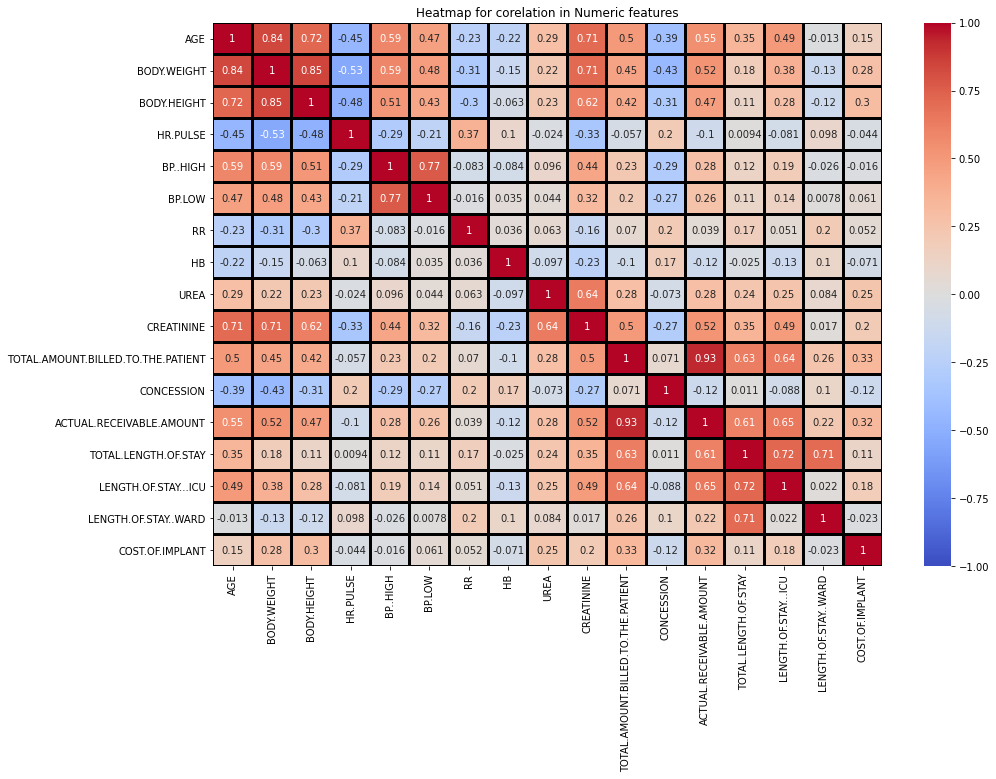

In [ ]:
##Find corelation in all numeric data

plt.figure(figsize = (15,10))
sn.heatmap(DAD_hospital[num_columns].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,linewidths=2,linecolor='black')
plt.title("Heatmap for corelation in Numeric features")

In [ ]:
DAD_hospital['PAST.MEDICAL.HISTORY.CODE'].unique()

array(['None', 'Diabetes2', 'hypertension1', 'hypertension3',
       'hypertension2', 'Diabetes1', 'other'], dtype=object)

In [ ]:
numeric_removed_features = ['ACTUAL.RECEIVABLE.AMOUNT','LENGTH.OF.STAY...ICU','LENGTH.OF.STAY..WARD']

In [ ]:
num_columns = list(set(num_columns)-set(numeric_removed_features))

In [ ]:
num_columns

['CONCESSION',
 'CREATININE',
 'TOTAL.AMOUNT.BILLED.TO.THE.PATIENT',
 'UREA',
 'BODY.HEIGHT',
 'AGE',
 'BP..HIGH',
 'COST.OF.IMPLANT',
 'BODY.WEIGHT',
 'BP.LOW',
 'TOTAL.LENGTH.OF.STAY',
 'HR.PULSE',
 'HB',
 'RR']

In [ ]:
DAD_hospital['BODY.HEIGHT'] = DAD_hospital['BODY.HEIGHT'].apply(lambda x : x/100)
DAD_hospital['BODY.HEIGHT']

Sl NO
1      1.60
2      1.55
3      1.64
4      1.73
5      1.75
       ... 
244    1.76
245    1.59
246    1.59
247    1.65
248    1.80
Name: BODY.HEIGHT, Length: 163, dtype: float64

In [ ]:
DAD_hospital['BMI'] = DAD_hospital['BODY.WEIGHT']/DAD_hospital['BODY.HEIGHT']**2


In [ ]:

if 'BMI' not in num_columns:
  num_columns.append('BMI')
if 'BODY.WEIGHT' in num_columns:
  num_columns.remove('BODY.WEIGHT')
if 'BODY.HEIGHT'in num_columns:
  num_columns.remove('BODY.HEIGHT')
DAD_hospital=DAD_hospital.drop(['BODY.WEIGHT','BODY.HEIGHT'],axis=1)

In [ ]:
categorical_features = [x for x in DAD_hospital.columns.tolist() if x not in DAD_hospital.select_dtypes(include=np.number).columns]

In [ ]:
categorical_features

['GENDER',
 'MARITAL.STATUS',
 'KEY.COMPLAINTS..CODE',
 'PAST.MEDICAL.HISTORY.CODE',
 'MODE.OF.ARRIVAL',
 'STATE.AT.THE.TIME.OF.ARRIVAL',
 'TYPE.OF.ADMSN',
 'IMPLANT.USED']

In [ ]:
num_columns =list(set(num_columns))

In [ ]:
num_columns

['CONCESSION',
 'BP..HIGH',
 'COST.OF.IMPLANT',
 'CREATININE',
 'TOTAL.AMOUNT.BILLED.TO.THE.PATIENT',
 'BP.LOW',
 'TOTAL.LENGTH.OF.STAY',
 'HR.PULSE',
 'UREA',
 'BMI',
 'HB',
 'RR',
 'AGE']

In [ ]:
X_features = categorical_features + num_columns


In [ ]:
DAD_encoded = pd.get_dummies(DAD_hospital[X_features],columns=categorical_features,drop_first=True)

In [ ]:
DAD_encoded.columns

Index(['CONCESSION', 'BP..HIGH', 'COST.OF.IMPLANT', 'CREATININE',
       'TOTAL.AMOUNT.BILLED.TO.THE.PATIENT', 'BP.LOW', 'TOTAL.LENGTH.OF.STAY',
       'HR.PULSE', 'UREA', 'BMI', 'HB', 'RR', 'AGE', 'GENDER_M',
       'MARITAL.STATUS_UNMARRIED', 'KEY.COMPLAINTS..CODE_CAD-DVD',
       'KEY.COMPLAINTS..CODE_CAD-SVD', 'KEY.COMPLAINTS..CODE_CAD-TVD',
       'KEY.COMPLAINTS..CODE_CAD-VSD', 'KEY.COMPLAINTS..CODE_OS-ASD',
       'KEY.COMPLAINTS..CODE_PM-VSD', 'KEY.COMPLAINTS..CODE_RHD',
       'KEY.COMPLAINTS..CODE_other- heart',
       'KEY.COMPLAINTS..CODE_other- respiratory',
       'KEY.COMPLAINTS..CODE_other-general',
       'KEY.COMPLAINTS..CODE_other-nervous',
       'KEY.COMPLAINTS..CODE_other-tertalogy',
       'PAST.MEDICAL.HISTORY.CODE_Diabetes2', 'PAST.MEDICAL.HISTORY.CODE_None',
       'PAST.MEDICAL.HISTORY.CODE_hypertension1',
       'PAST.MEDICAL.HISTORY.CODE_hypertension2',
       'PAST.MEDICAL.HISTORY.CODE_hypertension3',
       'PAST.MEDICAL.HISTORY.CODE_other', 'MODE.OF.ARRI

In [ ]:
X_features = DAD_encoded.columns

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

X = sm.add_constant(DAD_encoded)
Y = DAD_hospital['TOTAL.COST.TO.HOSPITAL']

train_X, test_X,train_y,test_y =  train_test_split(X,Y,train_size=0.8,random_state=43)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vit_factors(X):
  vif_factors = pd.DataFrame()
  vif_factors['column'] =X.columns
  vif_factors['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif_factors

In [ ]:
vif_factors = get_vit_factors(DAD_encoded)
vif_factors

,column,VIF
0,CONCESSION,2.956418
1,BP..HIGH,88.271361
2,COST.OF.IMPLANT,3.902199
3,CREATININE,17.697631
4,TOTAL.AMOUNT.BILLED.TO.THE.PATIENT,13.425608
5,BP.LOW,69.443356
6,TOTAL.LENGTH.OF.STAY,12.583728
7,HR.PULSE,35.916449
8,UREA,10.708479
9,BMI,1.635298


Text(0.5, 1.0, 'Figure Heatmap depicting correlation between features ')

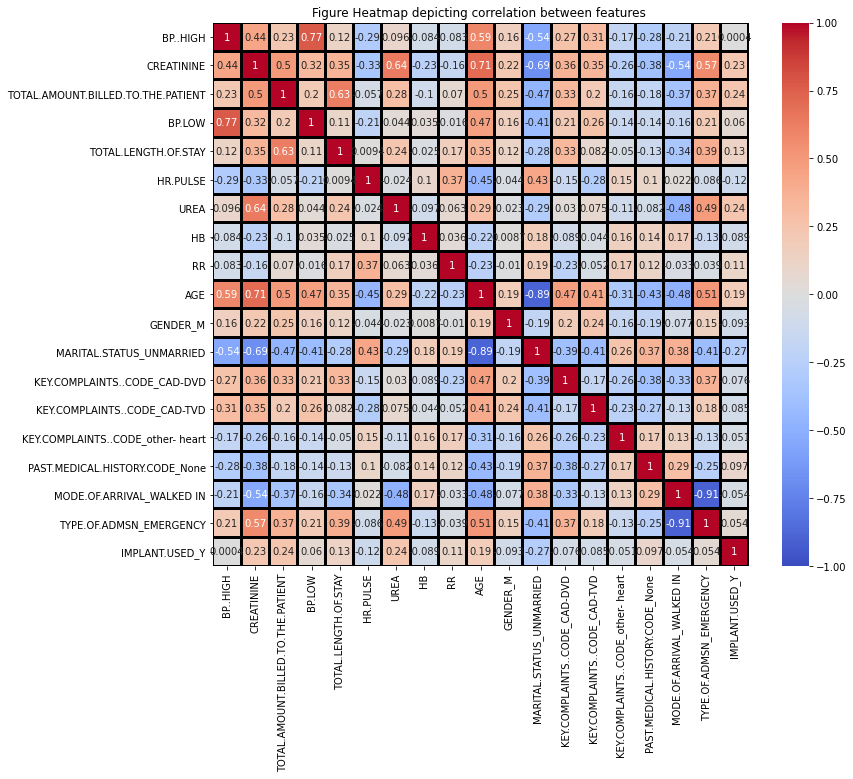

In [ ]:
columns_with_large_vifs  = vif_factors[vif_factors.VIF > 4].column

plt.figure(figsize = (12,10))
sn.heatmap(X[columns_with_large_vifs].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0,linewidths=2,linecolor='black')
plt.title("Figure Heatmap depicting correlation between features ")

In [ ]:
columns_to_be_removed = ['BP..HIGH','BP.LOW','MARITAL.STATUS_UNMARRIED','MODE.OF.ARRIVAL_WALKED IN','TOTAL.AMOUNT.BILLED.TO.THE.PATIENT','HR.PULSE','RR','HB','UREA']


In [ ]:
X_new_features =list(set(X_features)-set(columns_to_be_removed))

In [ ]:
 vif_factors= get_vit_factors(DAD_encoded[X_new_features])
 vif_factors

,column,VIF
0,KEY.COMPLAINTS..CODE_CAD-DVD,4.462439
1,KEY.COMPLAINTS..CODE_OS-ASD,1.764185
2,KEY.COMPLAINTS..CODE_CAD-VSD,1.080073
3,KEY.COMPLAINTS..CODE_other- respiratory,1.351202
4,COST.OF.IMPLANT,3.147113
5,PAST.MEDICAL.HISTORY.CODE_None,8.158834
6,KEY.COMPLAINTS..CODE_other-general,1.353271
7,PAST.MEDICAL.HISTORY.CODE_hypertension3,1.364924
8,MODE.OF.ARRIVAL_TRANSFERRED,1.259403
9,KEY.COMPLAINTS..CODE_other- heart,3.222658


##Find Outliers using z score and Cooks Distance

In [ ]:
from scipy.stats import zscore

z_score = zscore(DAD_encoded.CREATININE)

z_score= list(z_score)
len(z_score)

163

In [ ]:
for i in DAD_encoded.columns.to_list() :
  DAD_encoded['z_score_'+str(i)] = zscore(DAD_encoded[str(i)])
  print(DAD_encoded[(DAD_encoded['z_score_'+str(i)] > 3.0) | (DAD_encoded['z_score_'+str(i)] < -3.0 )])

       CONCESSION  BP..HIGH  ...  IMPLANT.USED_Y  z_score_CONCESSION
Sl NO                        ...                                    
2           96422        70  ...               1            3.952615
32         123132       100  ...               1            5.267016

[2 rows x 38 columns]
       CONCESSION  BP..HIGH  ...  z_score_CONCESSION  z_score_BP..HIGH
Sl NO                        ...                                      
6               0       215  ...           -0.792319          4.371676

[1 rows x 39 columns]
       CONCESSION  BP..HIGH  ...  z_score_BP..HIGH  z_score_COST.OF.IMPLANT
Sl NO                        ...                                           
4               0       110  ...         -0.162669                 3.288326
13            174       110  ...         -0.162669                 7.741075
171             0       110  ...         -0.162669                 3.845967

[3 rows x 40 columns]
       CONCESSION  BP..HIGH  ...  z_score_COST.OF.IMPLANT  z_s

In [ ]:
DAD_encoded.head(12)

,CONCESSION,BP..HIGH,COST.OF.IMPLANT,CREATININE,TOTAL.AMOUNT.BILLED.TO.THE.PATIENT,BP.LOW,TOTAL.LENGTH.OF.STAY,HR.PULSE,UREA,BMI,HB,RR,AGE,GENDER_M,MARITAL.STATUS_UNMARRIED,KEY.COMPLAINTS..CODE_CAD-DVD,KEY.COMPLAINTS..CODE_CAD-SVD,KEY.COMPLAINTS..CODE_CAD-TVD,KEY.COMPLAINTS..CODE_CAD-VSD,KEY.COMPLAINTS..CODE_OS-ASD,KEY.COMPLAINTS..CODE_PM-VSD,KEY.COMPLAINTS..CODE_RHD,KEY.COMPLAINTS..CODE_other- heart,KEY.COMPLAINTS..CODE_other- respiratory,KEY.COMPLAINTS..CODE_other-general,KEY.COMPLAINTS..CODE_other-nervous,KEY.COMPLAINTS..CODE_other-tertalogy,PAST.MEDICAL.HISTORY.CODE_Diabetes2,PAST.MEDICAL.HISTORY.CODE_None,PAST.MEDICAL.HISTORY.CODE_hypertension1,PAST.MEDICAL.HISTORY.CODE_hypertension2,PAST.MEDICAL.HISTORY.CODE_hypertension3,PAST.MEDICAL.HISTORY.CODE_other,MODE.OF.ARRIVAL_TRANSFERRED,MODE.OF.ARRIVAL_WALKED IN,TYPE.OF.ADMSN_EMERGENCY,IMPLANT.USED_Y,z_score_CONCESSION,z_score_BP..HIGH,z_score_COST.OF.IMPLANT,z_score_CREATININE,z_score_TOTAL.AMOUNT.BILLED.TO.THE.PATIENT,z_score_BP.LOW,z_score_TOTAL.LENGTH.OF.STAY,z_score_HR.PULSE,z_score_UREA,z_score_BMI,z_score_HB,z_score_RR,z_score_AGE,z_score_GENDER_M,z_score_MARITAL.STATUS_UNMARRIED,z_score_KEY.COMPLAINTS..CODE_CAD-DVD,z_score_KEY.COMPLAINTS..CODE_CAD-SVD,z_score_KEY.COMPLAINTS..CODE_CAD-TVD,z_score_KEY.COMPLAINTS..CODE_CAD-VSD,z_score_KEY.COMPLAINTS..CODE_OS-ASD,z_score_KEY.COMPLAINTS..CODE_PM-VSD,z_score_KEY.COMPLAINTS..CODE_RHD,z_score_KEY.COMPLAINTS..CODE_other- heart,z_score_KEY.COMPLAINTS..CODE_other- respiratory,z_score_KEY.COMPLAINTS..CODE_other-general,z_score_KEY.COMPLAINTS..CODE_other-nervous,z_score_KEY.COMPLAINTS..CODE_other-tertalogy,z_score_PAST.MEDICAL.HISTORY.CODE_Diabetes2,z_score_PAST.MEDICAL.HISTORY.CODE_None,z_score_PAST.MEDICAL.HISTORY.CODE_hypertension1,z_score_PAST.MEDICAL.HISTORY.CODE_hypertension2,z_score_PAST.MEDICAL.HISTORY.CODE_hypertension3,z_score_PAST.MEDICAL.HISTORY.CODE_other,z_score_MODE.OF.ARRIVAL_TRANSFERRED,z_score_MODE.OF.ARRIVAL_WALKED IN,z_score_TYPE.OF.ADMSN_EMERGENCY,z_score_IMPLANT.USED_Y
Sl NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,100,38000,0.8,474901,80,25,118,33,19.140625,11,32,58.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,-0.792319,-0.594512,1.155196,0.177191,2.432100,0.540243,2.383830,1.400500,0.253206,-0.153026,-0.714623,2.333159,0.994718,0.694131,-1.043908,-0.435639,-0.111456,-0.395004,-0.078567,-0.294392,-0.15861,-0.363242,1.697337,-0.177892,-0.078567,-0.078567,-0.269014,-0.241747,0.743223,-0.329914,-0.21183,-0.136931,-0.306529,-0.111456,-2.349468,2.349468,1.845374
2,96422,70,39690,1.7,944819,50,41,78,95,17.065557,11,28,59.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,3.952615,-1.890039,1.225264,2.131617,6.465218,-1.374097,5.319159,-0.667736,3.720554,-0.211234,-0.714623,1.269369,1.032405,0.694131,-1.043908,2.295481,-0.111456,-0.395004,-0.078567,-0.294392,-0.15861,-0.363242,-0.589158,-0.177892,-0.078567,-0.078567,-0.269014,-0.241747,0.743223,-0.329914,-0.21183,-0.136931,-0.306529,-0.111456,-2.349468,2.349468,1.845374
3,30000,110,0,0.8,390000,80,18,100,15,17.474717,12,20,82.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.683983,-0.162669,-0.420294,0.177191,1.703429,0.540243,1.099623,0.469794,-0.753443,-0.199757,-0.391058,-0.858211,1.899223,0.694131,-1.043908,-0.435639,-0.111456,2.531618,-0.078567,-0.294392,-0.15861,-0.363242,-0.589158,-0.177892,-0.078567,-0.078567,-0.269014,4.136558,-1.345491,-0.329914,-0.21183,-0.136931,-0.306529,-0.111456,0.425628,-0.425628,-0.541896
4,0,110,89450,1.5,324910,80,14,122,74,26.729927,12,24,46.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,-0.792319,-0.162669,3.288326,1.697300,1.144787,0.540243,0.365791,1.607323,2.546129,0.059865,-0.391058,0.205579,0.542465,0.694131,-1.043908,2.295481,-0.111456,-0.395004,-0.078567,-0.294392,-0.15861,-0.363242,-0.589158,-0.177892,-0.078567,-0.078567,-0.269014,-0.241747,-1.345491,3.031089,-0.21183,-0.136931,-0.306529,-0.111456,-2.349468,2.349468,1.845374
5,10000,180,0,1.9,254673,100,24,72,48,18.938776,10

In [ ]:
z_score_columns =[]
for x in DAD_encoded.columns.to_list() :
  if x.startswith('z_score_'):
   z_score_columns.append(x)

In [ ]:
print(z_score_columns)

['z_score_CONCESSION', 'z_score_BP..HIGH', 'z_score_COST.OF.IMPLANT', 'z_score_CREATININE', 'z_score_TOTAL.AMOUNT.BILLED.TO.THE.PATIENT', 'z_score_BP.LOW', 'z_score_TOTAL.LENGTH.OF.STAY', 'z_score_HR.PULSE', 'z_score_UREA', 'z_score_BMI', 'z_score_HB', 'z_score_RR', 'z_score_AGE', 'z_score_GENDER_M', 'z_score_MARITAL.STATUS_UNMARRIED', 'z_score_KEY.COMPLAINTS..CODE_CAD-DVD', 'z_score_KEY.COMPLAINTS..CODE_CAD-SVD', 'z_score_KEY.COMPLAINTS..CODE_CAD-TVD', 'z_score_KEY.COMPLAINTS..CODE_CAD-VSD', 'z_score_KEY.COMPLAINTS..CODE_OS-ASD', 'z_score_KEY.COMPLAINTS..CODE_PM-VSD', 'z_score_KEY.COMPLAINTS..CODE_RHD', 'z_score_KEY.COMPLAINTS..CODE_other- heart', 'z_score_KEY.COMPLAINTS..CODE_other- respiratory', 'z_score_KEY.COMPLAINTS..CODE_other-general', 'z_score_KEY.COMPLAINTS..CODE_other-nervous', 'z_score_KEY.COMPLAINTS..CODE_other-tertalogy', 'z_score_PAST.MEDICAL.HISTORY.CODE_Diabetes2', 'z_score_PAST.MEDICAL.HISTORY.CODE_None', 'z_score_PAST.MEDICAL.HISTORY.CODE_hypertension1', 'z_score_PAS

In [ ]:
x = z_score_columns[0]
if DAD_encoded[str(x)].value() > 3.0 :
  print('hello')


AttributeError: ignored

In [ ]:
def z_score_check(df,columns):
  for x in columns:
    if DAD_encoded[(df[str(x)] >3.0) | (df[str(x)] <  -3.0)]:
      df['z_score_all'] =df['z_score_all'] +1

In [ ]:
z_score_check(DAD_encoded,z_score_columns)

ValueError: ignored

##Cooks Distance

In [ ]:
DAD_influence =  DAD_encoded

####*Build Model*

In [ ]:
## Drop all z score columns
DAD_encoded.drop(columns=z_score_columns,inplace=True)

In [ ]:
DAD_encoded.columns.to_list()

['CONCESSION',
 'BP..HIGH',
 'COST.OF.IMPLANT',
 'CREATININE',
 'TOTAL.AMOUNT.BILLED.TO.THE.PATIENT',
 'BP.LOW',
 'TOTAL.LENGTH.OF.STAY',
 'HR.PULSE',
 'UREA',
 'BMI',
 'HB',
 'RR',
 'AGE',
 'GENDER_M',
 'MARITAL.STATUS_UNMARRIED',
 'KEY.COMPLAINTS..CODE_CAD-DVD',
 'KEY.COMPLAINTS..CODE_CAD-SVD',
 'KEY.COMPLAINTS..CODE_CAD-TVD',
 'KEY.COMPLAINTS..CODE_CAD-VSD',
 'KEY.COMPLAINTS..CODE_OS-ASD',
 'KEY.COMPLAINTS..CODE_PM-VSD',
 'KEY.COMPLAINTS..CODE_RHD',
 'KEY.COMPLAINTS..CODE_other- heart',
 'KEY.COMPLAINTS..CODE_other- respiratory',
 'KEY.COMPLAINTS..CODE_other-general',
 'KEY.COMPLAINTS..CODE_other-nervous',
 'KEY.COMPLAINTS..CODE_other-tertalogy',
 'PAST.MEDICAL.HISTORY.CODE_Diabetes2',
 'PAST.MEDICAL.HISTORY.CODE_None',
 'PAST.MEDICAL.HISTORY.CODE_hypertension1',
 'PAST.MEDICAL.HISTORY.CODE_hypertension2',
 'PAST.MEDICAL.HISTORY.CODE_hypertension3',
 'PAST.MEDICAL.HISTORY.CODE_other',
 'MODE.OF.ARRIVAL_TRANSFERRED',
 'MODE.OF.ARRIVAL_WALKED IN',
 'TYPE.OF.ADMSN_EMERGENCY',
 'IMPLANT

In [ ]:
X = sm.add_constant(DAD_encoded)
Y = DAD_hospital['TOTAL.COST.TO.HOSPITAL']

train_X, test_X,train_y,test_y =  train_test_split(X,Y,train_size=0.8,random_state=43)

In [ ]:
hospital_model1 = sm.OLS(train_y,train_X).fit()

In [ ]:
hospital_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Ordinary least squares
=======================================================================================================
Model:                        OLS                              Adj. R-squared:               0.725     
Dependent Variable:           TOTAL.COST.TO.HOSPITAL           AIC:                          3263.4824 
Date:                         2021-04-22 01:39                 BIC:                          3372.4487 
No. Observations:             130                              Log-Likelihood:               -1593.7   
Df Model:                     37                               F-statistic:                  10.20     
Df Residuals:                 92                               Prob (F-statistic):           1.27e-19  
R-squared:                    0.804                            Scale:                        3.6829e+09
-------------------------------------------------------------------------------------------------------
                                           Coef.      Std.Err.     t    P>|t|     [0.025       0.975]  
-------------------------------------------------------------------------------------------------------
const                                   -132365.0289 99708.3745 -1.3275 0.1876 -330394.4671  65664.4093
CONCESSION                                    0.1125     0.3652  0.3082 0.7586      -0.6127      0.8378
BP..HIGH                                     78.1248   480.5978  0.1626 0.8712    -876.3838   1032.6334
COST.OF.IMPLANT                               1.7963     0.6685  2.6871 0.0086       0.4686      3.1239
CREATININE                                31765.5059 27544.1104  1.1533 0.2518  -22939.4748  86470.4867
TOTAL.AMOUNT.BILLED.TO.THE.PATIENT            0.3771     0.0965  3.9076 0.0002       0.1854      0.5687
BP.LOW                                      323.8710   681.9064  0.4749 0.6359   -1030.4539   1678.1959
TOTAL.LENGTH.OF.STAY                       6773.3502  1599.6183  4.2344 0.0001    3596.3703   9950.3302
HR.PULSE                                    902.5224   391.2430  2.3068 0.0233     125.4801   1679.5648
UREA                                       -874.9776   636.8815 -1.3738 0.1728   -2139.8793    389.9240
BMI                                         -36.6089   146.6873 -0.2496 0.8035    -327.9425    254.7247
HB                                         1356.6991  2267.4819  0.5983 0.5511   -3146.7156   5860.1139
RR                                        -3552.3841  1844.2802 -1.9262 0.0572   -7215.2837    110.5156
AGE                                        1265.8773   651.1908  1.9439 0.0550     -27.4439   2559.1985
GENDER_M                                 -14087.7614 13584.4402 -1.0371 0.3024  -41067.6322  12892.1093
MARITAL.STATUS_UNMARRIED                  57924.7654 26858.2744  2.1567 0.0336    4581.9140 111267.6167
KEY.COMPLAINTS..CODE_CAD-DVD               1894.4668 32686.8194  0.0580 0.9539  -63024.3779  66813.3115
KEY.COMPLAINTS..CODE_CAD-SVD             -67334.0909 59226.2935 -1.1369 0.2585 -184962.6220  50294.4402
KEY.COMPLAINTS..CODE_CAD-TVD              34560.8232 32286.2747  1.0704 0.2872  -29562.5053  98684.1516
KEY.COMPLAINTS..CODE_CAD-VSD              17205.9859 64609.2809  0.2663 0.7906 -111113.6229 145525.5946
KEY.COMPLAINTS..CODE_OS-ASD               -7995.6591 27509.5361 -0.2907 0.7720  -62631.9723  46640.6541
KEY.COMPLAINTS..CODE_PM-VSD               15734.3797 40831.5277  0.3853 0.7009  -65360.5588  96829.3182
KEY.COMPLAINTS..CODE_RHD                 -57882.9740 31258.8760 -1.8517 0.0673 -119965.7999   4199.8519
KEY.COMPLAINTS..CODE_other- heart        -15569.3930 21635.3003 -0.7196 0.4736  -58538.9670  27400.1810
KEY.COMPLAINTS..CODE_other- respiratory   -3130.6322 36842.1693 -0.0850 0.9325  -76302.3605  70041.0962
KEY.COMPLAINTS..CODE_other-general       -10210.5410 82224.3916 -0.1242 0.9014 -173515.2800 153094.1981
KEY.COMPLAINTS..CODE_other-nervous 

In [ ]:
train_X =train_X[X_new_features]
hospital_model_2 = sm.OLS(train_y,train_X).fit()
hospital_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Ordinary least squares
======================================================================================================
Model:                        OLS                         Adj. R-squared (uncentered):      0.910     
Dependent Variable:           TOTAL.COST.TO.HOSPITAL      AIC:                              3286.8076 
Date:                         2021-04-22 01:44            BIC:                              3367.0985 
No. Observations:             130                         Log-Likelihood:                   -1615.4   
Df Model:                     28                          F-statistic:                      47.91     
Df Residuals:                 102                         Prob (F-statistic):               1.05e-46  
R-squared (uncentered):       0.929                       Scale:                            4.6357e+09
------------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------------------------
KEY.COMPLAINTS..CODE_CAD-DVD             27826.3677 31340.4808  0.8879 0.3767  -34337.3273  89990.0627
KEY.COMPLAINTS..CODE_OS-ASD               9344.5531 28176.6085  0.3316 0.7408  -46543.6163  65232.7226
KEY.COMPLAINTS..CODE_CAD-VSD             12377.2522 71244.9611  0.1737 0.8624 -128936.7904 153691.2948
KEY.COMPLAINTS..CODE_other- respiratory   3834.6549 39782.5204  0.0964 0.9234  -75073.7856  82743.0955
COST.OF.IMPLANT                              2.5210     0.6555  3.8460 0.0002       1.2209      3.8212
PAST.MEDICAL.HISTORY.CODE_None            4734.6275 21286.9362  0.2224 0.8244  -37487.9096  46957.1646
KEY.COMPLAINTS..CODE_other-general      -77848.9819 83621.2209 -0.9310 0.3541 -243711.2770  88013.3132
PAST.MEDICAL.HISTORY.CODE_hypertension3 107490.9815 48300.9535  2.2254 0.0283   11686.2693 203295.6938
MODE.OF.ARRIVAL_TRANSFERRED             -15524.1013 55883.1889 -0.2778 0.7817 -126368.1415  95319.9390
KEY.COMPLAINTS..CODE_other- heart        -2941.3320 20564.1047 -0.1430 0.8865  -43730.1362  37847.4721
CONCESSION                                   0.5316     0.3638  1.4613 0.1470      -0.1900      1.2533
PAST.MEDICAL.HISTORY.CODE_hypertension2 -18841.5883 44006.6138 -0.4282 0.6694 -106128.4981  68445.3216
GENDER_M                                  -209.3720 14405.5123 -0.0145 0.9884  -28782.6373  28363.8934
TYPE.OF.ADMSN_EMERGENCY                 -29860.2927 24789.4465 -1.2046 0.2312  -79030.0424  19309.4570
CREATININE                               12554.2722 24944.0661  0.5033 0.6158  -36922.1647  62030.7090
KEY.COMPLAINTS..CODE_CAD-TVD             35865.1005 31501.7507  1.1385 0.2576  -26618.4727  98348.6737
PAST.MEDICAL.HISTORY.CODE_Diabetes2     169257.6743 40569.2582  4.1721 0.0001   88788.7431 249726.6055
KEY.COMPLAINTS..CODE_PM-VSD              31803.0902 43784.7201  0.7264 0.4693  -55043.6945 118649.8748
KEY.COMPLAINTS..CODE_CAD-SVD            -77343.7082 64159.9062 -1.2055 0.2308 -204604.5779  49917.1615
AGE                                        918.3175   436.3696  2.1044 0.0378      52.7804   1783.8546
KEY.COMPLAINTS..CODE_other-nervous       13191.3262 71754.9934  0.1838 0.8545 -129134.3629 155517.0153
KEY.COMPLAINTS..CODE_RHD                -40370.6754 31787.3284 -1.2700 0.2070 -103420.6906  22679.3397
KEY.COMPLAINTS..CODE_other-tertalogy     32726.9420 27243.0160  1.2013 0.2324  -21309.4510  86763.3351
PAST.MEDICAL.HISTORY.CODE_hypertension1  20583.2994 31607.0070  0.6512 0.5164  -42109.0491  83275.6478
IMPLANT.USED_Y                           11705.5583 33885.9089  0.3454 0.7305  -55506.9814  78918.0979
TOTAL.LENGTH.OF.STAY                      9864.4792  1450.8926  6.7989 0.0000    6986.6406  12742.3179
BMI                                        -83.3293   156.9018 -0.5311 0.

In [ ]:
significant_features = ['COST.OF.IMPLANT','PAST.MEDICAL.HISTORY.CODE_hypertension3','PAST.MEDICAL.HISTORY.CODE_Diabetes2','AGE']
train_X = train_X[significant_features]
hospital_model_3= sm.OLS(train_y,train_X).fit()
hospital_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Ordinary least squares
=====================================================================================================
Model:                       OLS                         Adj. R-squared (uncentered):      0.757     
Dependent Variable:          TOTAL.COST.TO.HOSPITAL      AIC:                              3395.3334 
Date:                        2021-04-22 01:48            BIC:                              3406.8035 
No. Observations:            130                         Log-Likelihood:                   -1693.7   
Df Model:                    4                           F-statistic:                      102.2     
Df Residuals:                126                         Prob (F-statistic):               1.37e-38  
R-squared (uncentered):      0.764                       Scale:                            1.2510e+10
-----------------------------------------------------------------------------------------------------
                                           Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------------------------
COST.OF.IMPLANT                              2.5907     0.5230  4.9538 0.0000      1.5557      3.6256
PAST.MEDICAL.HISTORY.CODE_hypertension3  69505.5232 67420.5283  1.0309 0.3046 -63917.7203 202928.7668
PAST.MEDICAL.HISTORY.CODE_Diabetes2     217703.2008 44729.7317  4.8671 0.0000 129184.3767 306222.0250
AGE                                       3653.4607   290.6907 12.5682 0.0000   3078.1922   4228.7291
-----------------------------------------------------------------------------------------------------
Omnibus:                          2.036                    Durbin-Watson:                      1.731 
Prob(Omnibus):                    0.361                    Jarque-Bera (JB):                   1.542 
Skew:                             -0.181                   Prob(JB):                           0.462 
Kurtosis:                         3.392                    Condition No.:                      142474
=====================================================================================================
* The condition number is large (1e+05). This might indicate             strong multicollinearity or
other numerical problems.
"""

##Residual Analysis

In [ ]:
def draw_pp_plot( model, title):
  probplot = sm.ProbPlot(model.resid)
  plt.figure(figsize = (8,6))
  probplot.ppplot(line='45')
  plt.title(title)
  plt.show()

<Figure size 576x432 with 0 Axes>

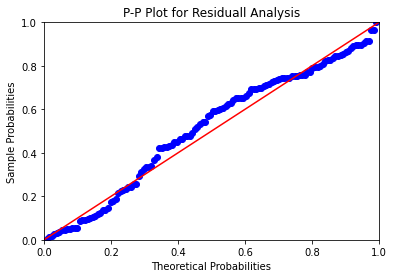

In [ ]:
draw_pp_plot(hospital_model_3,'P-P Plot for Residuall Analysis')

In [ ]:
pred_y =  hospital_model_3.predict(test_X[train_X.columns])

from sklearn import metrics
metrics.mean_squared_error(pred_y,test_y)

30308614060.540012

In [ ]:
np.round(metrics.r2_score(pred_y,test_y),2)

-0.15